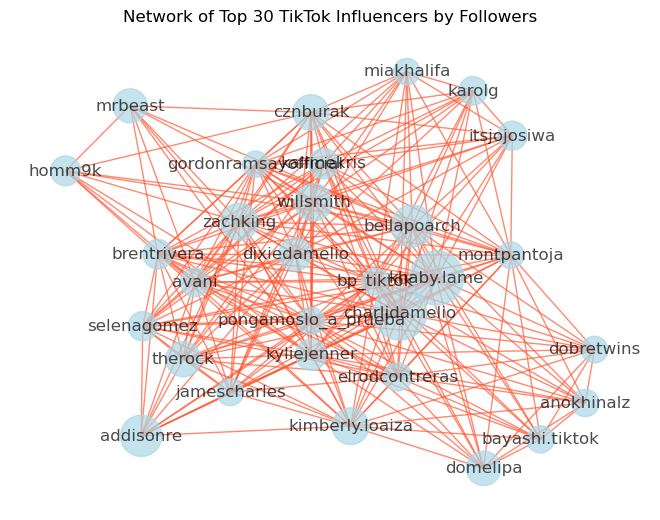

Centrality in the Top 30 Network:
charlidamelio 0.93
bp_tiktok 0.93
khaby.lame 0.90
bellapoarch 0.86
zachking 0.83
kyliejenner 0.83
pongamoslo_a_prueba 0.83
willsmith 0.79
dixiedamelio 0.76
brentrivera 0.72
avani 0.72
montpantoja 0.72
kimberly.loaiza 0.69
elrodcontreras 0.69
cznburak 0.66
kallmekris 0.66
gordonramsayofficial 0.66
therock 0.59
selenagomez 0.59
jamescharles 0.59
itsjojosiwa 0.45
karolg 0.45
miakhalifa 0.45
addisonre 0.41
domelipa 0.41
anokhinalz 0.41
bayashi.tiktok 0.41
dobretwins 0.41
mrbeast 0.31
homm9k 0.31


In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('social media influencers-TIKTOK - ---DEC 2022.csv')

# Convert followers, views, likes, comments, and shares from strings to numerical values
def convert_to_numeric(x):
    if 'M' in x:
        return float(x.replace('M', '')) * 1e6
    elif 'K' in x:
        return float(x.replace('K', '')) * 1e3
    else:
        return float(x)

data['followers'] = data['followers'].apply(convert_to_numeric)
data['views(avg)'] = data['views(avg)'].apply(convert_to_numeric)
data['likes(avg.)'] = data['likes(avg.)'].apply(convert_to_numeric)
data['comments(avg.)'] = data['comments(avg.)'].apply(convert_to_numeric)
data['shares(avg.)'] = data['shares(avg.)'].apply(convert_to_numeric)

# Sort and select the top 30 influencers by number of followers
top_influencers = data.sort_values(by='followers', ascending=False).head(30)

# Assuming a simple hashtag representation for each influencer
import random
hashtags_list = ['#fashion', '#music', '#travel', '#food', '#fitness']
top_influencers['hashtags'] = top_influencers['Tiktoker name'].apply(lambda _: random.sample(hashtags_list, k=random.randint(1, 3)))

# Create a graph for the top 30 influencers
G_top = nx.Graph()
for index, row in top_influencers.iterrows():
    G_top.add_node(row['Tiktoker name'], followers=row['followers'], hashtags=row['hashtags'])

# Add edges based on shared hashtags
for i in top_influencers.index:
    for j in top_influencers.index:
        if i != j:
            if set(top_influencers.at[i, 'hashtags']).intersection(top_influencers.at[j, 'hashtags']):
                G_top.add_edge(top_influencers.at[i, 'Tiktoker name'], top_influencers.at[j, 'Tiktoker name'])

# Visualization of the network
pos = nx.spring_layout(G_top, scale=2)  # Layout for clear separation of nodes
node_sizes = [top_influencers.at[i, 'followers'] / 100000 for i in top_influencers.index]  # Scale node size
nx.draw(G_top, pos, node_color='lightblue', node_size=node_sizes, with_labels=True, font_size=12, alpha=0.7, edge_color="#FF5733")
plt.title("Network of Top 30 TikTok Influencers by Followers")
plt.show()

# Degree centrality calculation to identify key influencers
centrality = nx.degree_centrality(G_top)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Centrality in the Top 30 Network:")
for influencer, cent in sorted_centrality:
    print(influencer, f"{cent:.2f}")
